In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import os
import matplotlib.pyplot as plt

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
# Autenticazione “di servizio” fornita da Colab
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

folder_id = '1gtE_lNw4MYiarzIu4qVAo-uu6aSzxS1d'
os.makedirs('/content/ndpi_files', exist_ok=True)

# Elenca e scarica tutti i file nella cartella
file_list = drive.ListFile(
    {'q': f"'{folder_id}' in parents and trashed=false"}
).GetList()

# 1) Definisci gli array
B = [
    "M-1.ndpi",
    '''
    "M-104.ndpi","M-105.ndpi","M-108.ndpi",
    "M-112.ndpi","M-121.ndpi","M-24.ndpi","M-30.ndpi",
    "M-32.ndpi","M-36.ndpi"
    '''
]
E = [
    "M-10.ndpi",
    '''
    "M-100.ndpi","M-102.ndpi","M-103.ndpi",
    "M-107.ndpi","M-109.ndpi","M-11.ndpi","M-110.ndpi",
    "M-111.ndpi","M-113.ndpi"
    '''
]
S = [
    "M-101.ndpi",
    '''
    "M-114.ndpi","M-65.ndpi","M-86.ndpi","M-87.ndpi"
    '''
]

base_dir = '/content/ndpi_files'
for sub in ('B','E','S'):
    os.makedirs(os.path.join(base_dir, sub), exist_ok=True)

for f in file_list:
    title = f['title']
    if title in B:
        dest = os.path.join(base_dir, 'B', title)
    elif title in E:
        dest = os.path.join(base_dir, 'E', title)
    elif title in S:
        dest = os.path.join(base_dir, 'S', title)
    else:
        continue

    print(f"Scarico {title} in {os.path.dirname(dest)} …")
    f.GetContentFile(dest)

Scarico M-101.ndpi in /content/ndpi_files/S …
Scarico M-10.ndpi in /content/ndpi_files/E …
Scarico M-1.ndpi in /content/ndpi_files/B …


In [5]:
!pip install openslide-python openslide-bin
import openslide

import glob

ndpi_path_b = glob.glob('/content/ndpi_files/B/*.ndpi')[0]
slide_b = openslide.OpenSlide(ndpi_path_b)
ndpi_path_e = glob.glob('/content/ndpi_files/E/*.ndpi')[0]
slide_e = openslide.OpenSlide(ndpi_path_e)
ndpi_path_s = glob.glob('/content/ndpi_files/S/*.ndpi')[0]
slide_s = openslide.OpenSlide(ndpi_path_s)

print("Dimensione B livello 0:", slide_b.level_dimensions[0])
print("Dimensione E livello 0:", slide_e.level_dimensions[0])
print("Dimensione S livello 0:", slide_s.level_dimensions[0])



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 67.8 MB/s eta 0:00:00
Dimensione B livello 0: (71040, 57728)
Dimensione E livello 0: (59520, 50688)
Dimensione S livello 0: (55680, 47872)


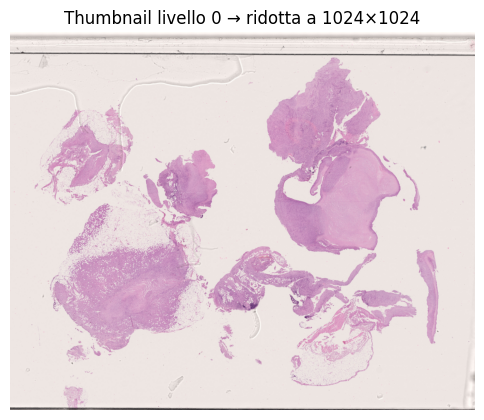

In [6]:
# Crea una miniatura con lato massimo 1024px
thumb = slide_b.get_thumbnail((1024, 1024))
plt.figure(figsize=(6,6))
plt.imshow(thumb)
plt.axis('off')
plt.title('Thumbnail livello 0 → ridotta a 1024×1024')
plt.show()


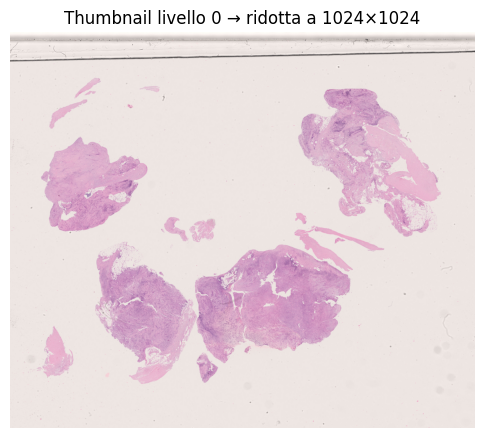

In [7]:
# Crea una miniatura con lato massimo 1024px
thumb = slide_e.get_thumbnail((1024, 1024))
plt.figure(figsize=(6,6))
plt.imshow(thumb)
plt.axis('off')
plt.title('Thumbnail livello 0 → ridotta a 1024×1024')
plt.show()


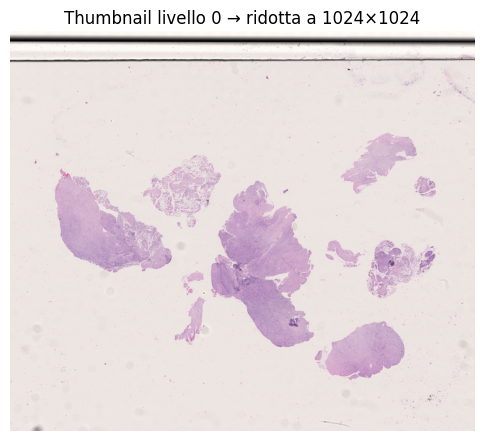

In [8]:

# Crea una miniatura con lato massimo 1024px
thumb = slide_s.get_thumbnail((1024, 1024))
plt.figure(figsize=(6,6))
plt.imshow(thumb)
plt.axis('off')
plt.title('Thumbnail livello 0 → ridotta a 1024×1024')
plt.show()


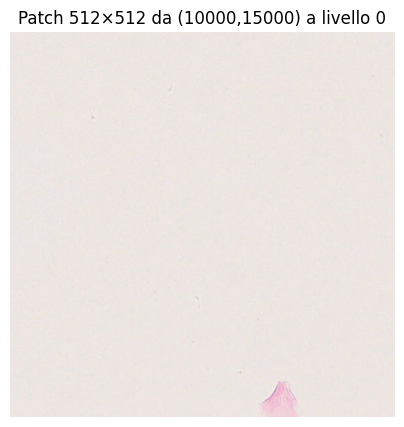

In [9]:
# Lettura di una regione a livello 0 (intera risoluzione)
# Coordinate (x, y) in pixel su livello 0, dimensione patch 512×512
region = slide_b.read_region((20000, 15000), level=0, size=(512, 512))
region = region.convert('RGB')  # rimuove canale alfa

plt.figure(figsize=(5,5))
plt.imshow(region)
plt.axis('off')
plt.title('Patch 512×512 da (10000,15000) a livello 0')
plt.show()


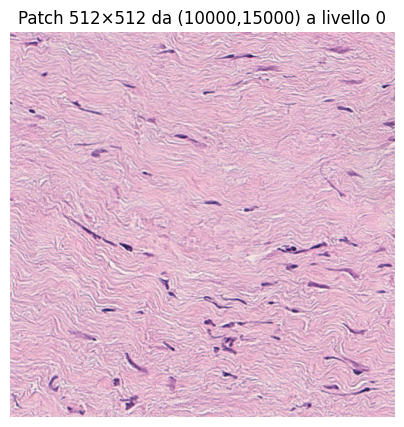

In [10]:
# Lettura di una regione a livello 0 (intera risoluzione)
# Coordinate (x, y) in pixel su livello 0, dimensione patch 512×512
region = slide_e.read_region((10000, 15000), level=0, size=(512, 512))
region = region.convert('RGB')  # rimuove canale alfa

plt.figure(figsize=(5,5))
plt.imshow(region)
plt.axis('off')
plt.title('Patch 512×512 da (10000,15000) a livello 0')
plt.show()


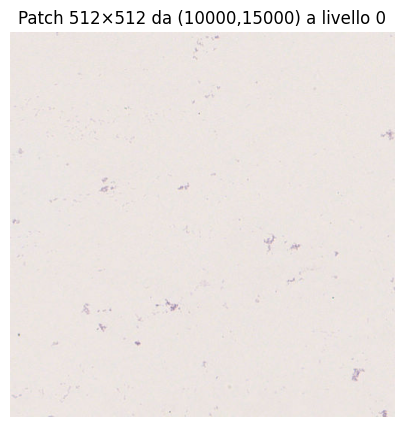

In [11]:
# Lettura di una regione a livello 0 (intera risoluzione)
# Coordinate (x, y) in pixel su livello 0, dimensione patch 512×512
region = slide_s.read_region((20000, 15000), level=0, size=(512, 512))
region = region.convert('RGB')  # rimuove canale alfa

plt.figure(figsize=(5,5))
plt.imshow(region)
plt.axis('off')
plt.title('Patch 512×512 da (10000,15000) a livello 0')
plt.show()


In [12]:
!git clone https://github.com/LucaIanniello/MLIAProject.git

Cloning into 'MLIAProject'...
remote: Enumerating objects: 195, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 195 (delta 27), reused 52 (delta 17), pack-reused 133 (from 1)
Receiving objects: 100% (195/195), 48.87 MiB | 21.29 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [13]:
!pip install -q condacolab
import condacolab
condacolab.install()

!conda env create -f MLIAProject/CLAM/env.yml
!conda install -n clam_latest -c conda-forge openslide
!conda install -n clam_latest -c conda-forge openslide-tools libopenslide0 libtiff-dev libjpeg-dev
!conda run -n clam_latest python --version
!conda run -n clam_latest pip list

!apt-get update
!apt-get install -y openslide-tools libopenslide0 libtiff-dev libjpeg-dev

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:10
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



python-3.10.0        | 29.8 MB   | :   0% 0/1 [00:00<?, ?it/s]
openssl-3.5.0        | 3.0 MB    | :   0% 0/1 [00:00<?, ?it/s]

pip-25.1.1           | 1.2 MB    | :   0% 0/1 [00:00<?, ?it/s]


libsqlite-3.49.2     | 895 KB    | :   0% 0/1 [00:00<?, ?it/s]



ncurses-6.5          | 871 KB    | :   0% 0/1 [00:00<?, ?it/s]




sqlite-3.49.2        | 840 KB    | :   0% 0/1 [00:00<?, ?it/s]





libgcc-15.1.0        | 810 KB    | :   0% 0/1 [00:00<?, ?it/s]






setuptools-80.8.0 

In [14]:
# !pip install -r /content/MLIAProject/CLAM/requirements.txt

In [15]:

!conda --version
!which conda
!conda config --show-sources
!conda env update -n base -f MLIAProject/CLAM/env.yml


conda 24.11.2
/usr/local/bin/conda
==> /usr/local/.condarc <==
channels:
  - conda-forge
always_yes: True

Channels:
 - conda-forge
Platform: linux-64
Solving environment: / - failed

SpecsConfigurationConflictError: Requested specs conflict with configured specs.
  requested specs: 
    - pip
    - python==3.10
  pinned specs: 
    - cuda-version=12
    - python=3.11
    - python_abi=3.11[build=*cp311*]
Use 'conda config --show-sources' to look for 'pinned_specs' and 'track_features'
configuration parameters.  Pinned specs may also be defined in the file
/usr/local/conda-meta/pinned.




In [16]:
!conda run -n clam_latest python presets_generator.py

python: can't open file '/content/presets_generator.py': [Errno 2] No such file or directory

ERROR conda.cli.main_run:execute(125): `conda run python presets_generator.py` failed. (See above for error)


In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_patches_fp.py \
    --source ndpi_files/B/ \
    --save_dir results/RESULTS_DIRECTORY_otsu \
    --patch_size 256 \
    --seg \
    --patch \
    --stitch \
    --preset process_list_edited_use_otsu.csv

In [18]:
!cp -r MLIAProject/presets .

In [2]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_patches_fp.py \
    --source ndpi_files/B/ \
    --save_dir results/RESULTS_DIRECTORY \
    --patch_size 256 \
    --seg \
    --patch \
    --stitch

source:  ndpi_files/B/
patch_save_dir:  results/RESULTS_DIRECTORY/patches
mask_save_dir:  results/RESULTS_DIRECTORY/masks
stitch_save_dir:  results/RESULTS_DIRECTORY/stitches
source : ndpi_files/B/
save_dir : results/RESULTS_DIRECTORY
patch_save_dir : results/RESULTS_DIRECTORY/patches
mask_save_dir : results/RESULTS_DIRECTORY/masks
stitch_save_dir : results/RESULTS_DIRECTORY/stitches
{'seg_params': {'seg_level': -1, 'sthresh': 8, 'mthresh': 7, 'close': 4, 'use_otsu': False, 'keep_ids': 'none', 'exclude_ids': 'none'}, 'filter_params': {'a_t': 100, 'a_h': 16, 'max_n_holes': 8}, 'patch_params': {'use_padding': True, 'contour_fn': 'four_pt'}, 'vis_params': {'vis_level': -1, 'line_thickness': 250}}


progress: 0.00, 0/1
processing M-1.ndpi
Creating patches for:  M-1 ...
Total number of contours to process:  1
Bounding Box: 0 0 70977 57665
Contour Area: 4082927616.0
Extracted 62827 coordinates
original size: 71040 x 57728
downscaled size for stiching: 1110 x 902
start stitching M-1
number of

In [20]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_patches_fp.py \
    --source ndpi_files/B/ \
    --save_dir results/RESULTS_DIRECTORY_11 \
    --patch_size 256 \
    --seg \
    --patch \
    --stitch \
    --preset process_list_edited_th11.csv



source:  ndpi_files/B/
patch_save_dir:  results/RESULTS_DIRECTORY_11/patches
mask_save_dir:  results/RESULTS_DIRECTORY_11/masks
stitch_save_dir:  results/RESULTS_DIRECTORY_11/stitches
source : ndpi_files/B/
save_dir : results/RESULTS_DIRECTORY_11
patch_save_dir : results/RESULTS_DIRECTORY_11/patches
mask_save_dir : results/RESULTS_DIRECTORY_11/masks
stitch_save_dir : results/RESULTS_DIRECTORY_11/stitches
{'seg_params': {'seg_level': np.int64(6), 'sthresh': np.int64(11), 'mthresh': np.int64(7), 'close': np.int64(4), 'use_otsu': np.False_, 'keep_ids': 'none', 'exclude_ids': 'none'}, 'filter_params': {'a_t': np.float64(120.0), 'a_h': np.float64(16.0), 'max_n_holes': np.int64(8)}, 'patch_params': {'use_padding': np.True_, 'contour_fn': 'four_pt'}, 'vis_params': {'vis_level': np.int64(6), 'line_thickness': np.int64(250)}}


progress: 0.00, 0/1
processing M-1.ndpi
Creating patches for:  M-1 ...
Total number of contours to process:  1
Bounding Box: 0 320 70977 57345
Contour Area: 4062234624.0

In [21]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_patches_fp.py \
    --source ndpi_files/B/ \
    --save_dir results/RESULTS_DIRECTORY_12 \
    --patch_size 256 \
    --seg \
    --patch \
    --stitch \
    --preset process_list_edited_th12.csv



source:  ndpi_files/B/
patch_save_dir:  results/RESULTS_DIRECTORY_12/patches
mask_save_dir:  results/RESULTS_DIRECTORY_12/masks
stitch_save_dir:  results/RESULTS_DIRECTORY_12/stitches
source : ndpi_files/B/
save_dir : results/RESULTS_DIRECTORY_12
patch_save_dir : results/RESULTS_DIRECTORY_12/patches
mask_save_dir : results/RESULTS_DIRECTORY_12/masks
stitch_save_dir : results/RESULTS_DIRECTORY_12/stitches
{'seg_params': {'seg_level': np.int64(6), 'sthresh': np.int64(12), 'mthresh': np.int64(7), 'close': np.int64(4), 'use_otsu': np.False_, 'keep_ids': 'none', 'exclude_ids': 'none'}, 'filter_params': {'a_t': np.float64(120.0), 'a_h': np.float64(16.0), 'max_n_holes': np.int64(8)}, 'patch_params': {'use_padding': np.True_, 'contour_fn': 'four_pt'}, 'vis_params': {'vis_level': np.int64(6), 'line_thickness': np.int64(250)}}


progress: 0.00, 0/1
processing M-1.ndpi
Creating patches for:  M-1 ...
Total number of contours to process:  5
Bounding Box: 30272 32768 31873 18241
Contour Area: 222347

In [22]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_patches_fp.py \
    --source ndpi_files/B/ \
    --save_dir results/RESULTS_DIRECTORY_13 \
    --patch_size 256 \
    --seg \
    --patch \
    --stitch \
    --preset process_list_edited_th13.csv

source:  ndpi_files/B/
patch_save_dir:  results/RESULTS_DIRECTORY_13/patches
mask_save_dir:  results/RESULTS_DIRECTORY_13/masks
stitch_save_dir:  results/RESULTS_DIRECTORY_13/stitches
source : ndpi_files/B/
save_dir : results/RESULTS_DIRECTORY_13
patch_save_dir : results/RESULTS_DIRECTORY_13/patches
mask_save_dir : results/RESULTS_DIRECTORY_13/masks
stitch_save_dir : results/RESULTS_DIRECTORY_13/stitches
{'seg_params': {'seg_level': np.int64(6), 'sthresh': np.int64(13), 'mthresh': np.int64(7), 'close': np.int64(4), 'use_otsu': np.False_, 'keep_ids': 'none', 'exclude_ids': 'none'}, 'filter_params': {'a_t': np.float64(120.0), 'a_h': np.float64(16.0), 'max_n_holes': np.int64(8)}, 'patch_params': {'use_padding': np.True_, 'contour_fn': 'four_pt'}, 'vis_params': {'vis_level': np.int64(6), 'line_thickness': np.int64(250)}}


progress: 0.00, 0/1
processing M-1.ndpi
Creating patches for:  M-1 ...
Total number of contours to process:  4
Bounding Box: 30336 32768 31809 17729
Contour Area: 215971

In [7]:
!MPLBACKEND=Agg conda run -n clam_latest python -u MLIAProject/CLAM/extract_features_fp.py \
    --data_h5_dir "/content/results/RESULTS_DIRECTORY/" \
    --data_slide_dir "/content/ndpi_files/B/" \
    --csv_path "/content/results/RESULTS_DIRECTORY/process_list_autogen.csv" \
    --feat_dir results_features/FEATURES_DIRECTORY \
    --batch_size 128 \
    --slide_ext .ndpi

initializing dataset
loading model checkpoint
TimmCNNEncoder(
  (model): FeatureListNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), 

In [8]:
import torch

data = torch.load('results_features/FEATURES_DIRECTORY/pt_files/M-1.pt')


In [13]:
import h5py

# Sostituisci 'nome_file.h5' con il percorso del tuo file .h5
with h5py.File('/content/results/RESULTS_DIRECTORY/patches/M-1.h5', 'r') as f:
    n_patches = f['coords'].shape[0]  # oppure f['coords'].shape[0]
    print(f"Numero di patch: {n_patches}")

print(type(data))
print(len(data))  # se è una lista
print(data.shape) # se è un tensore
print(data[:5])  # se è una lista o un tensore


Numero di patch: 62827
<class 'torch.Tensor'>
62827
torch.Size([62827, 1024])
tensor([[0.1236, 0.0117, 0.0419,  ..., 0.0094, 0.0012, 0.0029],
        [0.1033, 0.0070, 0.0431,  ..., 0.0345, 0.0032, 0.0003],
        [0.1005, 0.0062, 0.0525,  ..., 0.0416, 0.0014, 0.0003],
        [0.1586, 0.0122, 0.0256,  ..., 0.0142, 0.0104, 0.0027],
        [0.1318, 0.0075, 0.0269,  ..., 0.0113, 0.0108, 0.0089]])


In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python -u MLIAProject/CLAM/extract_features_fp.py \
    --data_h5_dir "/content/results/RESULTS_DIRECTORY_otsu/" \
    --data_slide_dir "/content/ndpi_files/B/" \
    --csv_path "/content/results/RESULTS_DIRECTORY_otsu/process_list_autogen.csv" \
    --feat_dir results_features/FEATURES_DIRECTORY_otsu \
    --batch_size 128 \
    --slide_ext .ndpi

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python -u MLIAProject/CLAM/extract_features_fp.py \
    --data_h5_dir "/content/results/RESULTS_DIRECTORY_11/" \
    --data_slide_dir "/content/ndpi_files/B/" \
    --csv_path "/content/results/RESULTS_DIRECTORY_11/process_list_autogen.csv" \
    --feat_dir results_features/FEATURES_DIRECTORY_11 \
    --batch_size 128 \
    --slide_ext .ndpi

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python -u MLIAProject/CLAM/extract_features_fp.py \
    --data_h5_dir "/content/results/RESULTS_DIRECTORY_12/" \
    --data_slide_dir "/content/ndpi_files/B/" \
    --csv_path "/content/results/RESULTS_DIRECTORY_12/process_list_autogen.csv" \
    --feat_dir results_features/FEATURES_DIRECTORY_12 \
    --batch_size 128 \
    --slide_ext .ndpi

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python -u MLIAProject/CLAM/extract_features_fp.py \
    --data_h5_dir "/content/results/RESULTS_DIRECTORY_13/" \
    --data_slide_dir "/content/ndpi_files/B/" \
    --csv_path "/content/results/RESULTS_DIRECTORY_13/process_list_autogen.csv" \
    --feat_dir results_features/FEATURES_DIRECTORY_13 \
    --batch_size 128 \
    --slide_ext .ndpi